Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


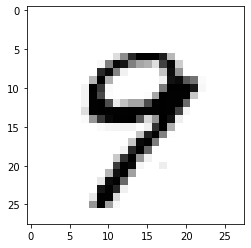

In [0]:
#mnist01.py

from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

# 숫자 이미지 파일을 MNIST_data 폴더에 다운로드
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# 임의로 1개의 파일을 구해옴
batch_xs, batch_ys = mnist.train.next_batch(1)
# print(batch_xs.shape)
# print(batch_ys.shape)
# print(batch_xs.reshape(28,28))
#print(batch_xs)
print(batch_ys)

# 1장의 이미지는 28 * 28 개의 픽셀로 되어있음
plt.imshow(batch_xs.reshape(28,28), cmap='Greys')
plt.show()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
데이터 갯수= 55000
Epoch: 0001 cost = 2.567894170
Epoch: 0002 cost = 1.057073266
Epoch: 0003 cost = 0.852373443
Epoch: 0004 cost = 0.751388038
Epoch: 0005 cost = 0.686439342
Epoch: 0006 cost = 0.640169768
Epoch: 0007 cost = 0.605904830
Epoch: 0008 cost = 0.577114295
Epoch: 0009 cost = 0.553933743
Epoch: 0010 cost = 0.534603617
Epoch: 0011 cost = 0.517797836
Epoch: 0012 cost = 0.503041444
Epoch: 0013 cost = 0.489816915
Epoch: 0014 cost = 0.478698714
Epoch: 0015 cost = 0.467733404
Learning finished
Accuracy:  0.8898
Label:  [2]
Prediction:  [8]


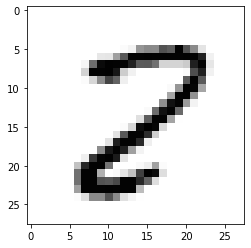

In [0]:
#mnist02.py

from tensorflow.examples.tutorials.mnist import input_data
import random
import tensorflow as tf
import matplotlib.pyplot as plt

# 난수 시드값 설정하지 않으면 결과가 매번 달라질 수 있음
tf.set_random_seed(777) # for reproducibility

# Check out https://www.tensorflow.org/get_started/mnist/beginners
# for more information about the mnist dataset
# 자동으로 이미지를 다운로드
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# 클래스 갯수: 숫자 이미지 파일 갯수
nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784]) # 784행

# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes]) # 10열

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
# arg_max(): one-hot-encoding을 만들어 주는 함수(가장 확률이 높은것을 1로, 나머지는 0으로 만듬)
# 10개의 예측값중에서 가장큰값을 구함
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))

# Calculate accuracy
# float형으로 형변환 (정확도 구함)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters (550번 학습한 것이 1 epoch?)
training_epochs = 15
batch_size = 100 # batch_size : 큰 파일을 나눠서 읽어옴 (100개) - 메모리가 부족하기 때문에
# 55000 / 100 = 550
# epoch : 반복횟수(1번 다 읽어온것)
print('데이터 갯수=', mnist.train.num_examples) # 55,000 개

with tf.Session() as sess:
  # Initialize TensorFlow variables
  sess.run(tf.global_variables_initializer())
  # Training cycle
  # 전체 총 학습 횟수는 15회
  for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    # 55,000개를 이미지 100개씩 나눈 550번개 batch를 학습한 1회가 1 epoch, 15 epoch 수행
    # epoch = 1
    # total_batch = 550
    # batch_size = 100 (한 번에 가져오는 이미지 개수)
    for i in range(total_batch):
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
      avg_cost += c / total_batch
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
  print("Learning finished")
  
  # Test the model using test sets
  print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
  
  # Get one and predict
  r = random.randint(0, mnist.test.num_examples - 1)
  print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
  print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))
  
  # don't know why this makes Travis Build error.
  plt.imshow(
      mnist.test.images[r:r + 1].reshape(28, 28)
      ,cmap='Greys'
      ,interpolation='nearest'
      )
  plt.show()

In [0]:
#tb_mul.py

import tensorflow as tf

# 상수 선언
a = tf.constant(20, name="a")
b = tf.constant(30, name="b")
mul = a * b

# 세션 생성하기
sess = tf.Session()

# tensorboard 사용하기
# tensorboard 로그가 저장될 폴더(log_dir)가 생성된다.
tw = tf.summary.FileWriter("log_dir", graph=sess.graph)

# 세션 실행하기
print(sess.run(mul))

600


TensorBoard 사용법

1. 이전 예제의 tensorboard 로그 파일을 삭제한다.
>
> c:\> cd C:\pythonwork\python3\tensorflow\src\ch05\log_dir
> 
> c:\> del *.*

2. tensorflow 예제 파일 생성/실행 한다. (tb_add.py)
>
> C:\pythonwork\python3\tensorflow\src\ch05\log_dir 디렉토리가 생성되고,
>
> log_dir디렉토리 안에 tensorboard 로그 파일이 생성됨

3. 콘솔창에서 log_dir 디렉토리 이전 디렉토리 까지 이동후 tensorboard를 실행한다.
>
> c:\> cd c:\pythonwork\python3\tensorflow\src\ch05
>
> c:\> tensorboard --logdir = log_dir <-- tensorboard 실행

4. 웹브라우저에 다음 http://localhost:6006 입력후 실행한다.
>
> ( 잘 실행되지 않는 경우에는 chrome, firefox 웹브라우저로 실행 해본다.)

https://playground.tensorflow.org/

In [12]:
#classification.py

import tensorflow as tf
import numpy as np

tf.set_random_seed(777)

# 학습에 사용할 데이터 정의
# 털과 날개가 있느냐를 담은 특징 데이터를 구성한다.(있으면1, 없으면 0)
# [털, 날개]
x_data = np.array(
    [[0, 0], [1, 0], [1, 1], [0, 0], [0, 0], [0, 1]]
    )

# 1) 각 개체가 실제 어떤 종류인지를 나타내는 레이블(분류값) 데이터를 구성합니다.
# 2)위에서 정의한 특징 데이터의 각 개체가 포유류인지 조류인지, 아니면 제3의 종류인지를
# 기록한 실제 결과값이다.
# 3)다음과 같은 형식을 one-hot 형식의 데이터라고 합니다.
# 4)원-핫 인코딩(one-hot encoding)이란 데이터가 가질 수 있는 값들을 일렬로 나열한 배열을
# 만들고, 그중 표현하려는 값을 뜻하는 인덱스의 원소만 1로 표기하고 나머지 원소는 모두 0으로
# 채우는 표기법입니다.
# 5)예를 들어, 우리가 판별하고자 하는 개체의 종류는 기타, 포유류, 조류 이렇게 세 가지 이고,
# 이를 배열에 넣으면 [기타, 포유류, 조류]처럼 될 것이다.
# 6)각 종류의 인덱스는 기타=0, 포유류=1, 조류=2가 되겠죠. 이를 원-핫-인코딩 형식으로 만들면
# 다음처럼 된다.

# [기타, 포유류, 조류]
y_data = np.array([
                   # 기타
                   [1, 0, 0]
                   # 포유류
                   , [0, 1, 0]
                   # 조류
                   , [0, 0, 1]
                   # 기타
                   , [1, 0, 0]
                   # 기타
                   , [1, 0, 0]
                   # 조류
                   , [0, 0, 1]
                   ])

####################
# 신경망 모델 구성
####################
# 특징 X와 레이블 Y와의 관계를 알아내는 모델입니다.
# 플레이스홀더 X, Y 설정
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
# 신경망은 2차원으로
# 가중치 변수 W는 [입력층(특징 수), 출력층(레이블 수)] -> [2, 3] 으로 설정
W = tf.Variable(tf.random_uniform([2, 3], -1., 1.))
# 편향을 각각 각 레이어의 아웃풋 갯수로 설정합니다.
# 편향은 아웃풋의 갯수, 즉 최종 결과값의 분류 갯수인 3으로 설정합니다.
# 편향 변수 b는 레이블 수인 3개의 요소를 가진 변수로 설정
b = tf.Variable(tf.zeros([3]))

# 신경망에 가중치 W과 편향 b을 적용합니다
L = tf.add(tf.matmul(X, W), b)
# 가중치와 편향을 이용해 계산한 결과 값에
# 텐서플로우에서 기본적으로 제공하는 활성화 함수인 ReLU 함수를 적용합니다.
# hidden Layer 하나 추가한다고 생각하면 됨(이 순간부터 딥러닝!)
L = tf.nn.relu(L)
# 마지막으로 softmax 함수를 이용하여 출력값을 사용하기 쉽게 만듭니다
# softmax 함수는 다음처럼 결과값을 전체합이 1인 확률로 만들어주는 함수입니다.
# 예) [8.04, 2.76, -6.52] -> [0.53 0.24 0.23]
model = tf.nn.softmax(L)

# 신경망을 최적화하기 위한 비용 함수를 작성합니다.
# 각 개별 결과에 대한 합을 구한 뒤 평균을 내는 방식을 사용합니다.
# 전체 합이 아닌, 개별 결과를 구한 뒤 평균을 내는 방식을 사용하기 위해 axis 옵션을 사용합니다.
# axis 옵션이 없으면 -1.09 처럼 총합인 스칼라값으로 출력됩니다.
# Y model Y * tf.log(model) reduce_sum(axis=1)
# 예) [[1 0 0] [[0.1 0.7 0.2] -> [[-1.0 0 0] -> [-1.0, -0.09]
# [0 1 0]] [0.2 0.8 0.0]] [ 0 -0.09 0]]
# 즉, 이것은 예측값과 실제값 사이의 확률 분포의 차이를 비용으로 계산한 것이며,
# 이것을 교차 엔트로피(Cross-Entropy) 라고 합니다.
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(model), axis=1))
# 경사하강법으로 비용을 최적화합니다.
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
# 경사하강법보다 성능이 좋은 AdamOptimizer
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(cost)

####################
# 신경망 모델 학습
####################
# 텐서플로의 세션을 초기화
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
# 위에서 구성한 특징과 레이블 데이터를 이용해 100번 학습을 진행
for step in range(100):
  sess.run(train_op, feed_dict={X: x_data, Y: y_data})
  # 학습 도중에 10번에 한번씩 손실값을 출력함
  if (step + 1) % 10 == 0:
    print(step + 1, sess.run(cost, feed_dict={X: x_data, Y: y_data}))

##############################
# 결과 확인
# 0: 기타 1: 포유류, 2: 조류
#############################
# 학습된 결과를 확인해보는 코드 작성
# 1)예측값인 model을 바로 출력하면 [0.2, 0.7, 0.1]과 같이 확률로 나오기 때문에, 요소 중
# 2)가장 큰 값의 인덱스를 찾아주는 argmax 함수를 사용하여 레이블 값을 출력
# 3)tf.argmax: 예측값과 실제값의 행렬에서 tf.argmax 를 이용해 가장 큰 값을 가져옵니다.
# 4)원-핫 인코딩을 거꾸로 한 결과를 만들어준다.
# 예) [[0 1 0] [1 0 0]] -> [1 0]
# [[0.2 0.7 0.1] [0.9 0.1 0.]] -> [1 0]
prediction = tf.argmax(model, 1) # 예측값
target = tf.argmax(Y, 1) # 실제값
print('예측값:', sess.run(prediction, feed_dict={X: x_data}))
print('실제값:', sess.run(target, feed_dict={Y: y_data}))

# 정확도 출력
# 1)전체 학습 데이터에 대한 예측값과 실측값을 tf.equal()함수로 비교한 뒤,
# true, false 값으로 나온 결과를 다시 tf.cast()함수를 이용해 0과 1로 바꾸어
# 평균을 내면 간단히 정확도를 구할 수 있다.
# 2)프로그램을 실행해서 학습을 시키면, 손실값이 점점 줄어드는 것을 확인할 수 있다.
# 하지만, 실망스럽게도 아무리 학습횟수를 늘려도 정확도가 크게 높아지지 않는다.
# 그 이유는 신경망이 한 층밖에 안 되기 때문인데, 하나의 층(hidden layer)을 더 늘리면
# 정확도가 높아진다.
is_correct = tf.equal(prediction, target)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도: %.2f' % sess.run(accuracy * 100, feed_dict={X: x_data, Y: y_data}))

10 0.9360135
20 0.9149382
30 0.9010996
40 0.88978595
50 0.87887526
60 0.86920685
70 0.86014694
80 0.8514938
90 0.8435934
100 0.8360533
예측값: [0 2 2 0 0 2]
실제값: [0 1 2 0 0 2]
정확도: 83.33


In [13]:
#deepNN.py

# 털과 날개가 있는지 없는지에 따라, 포유류인지 조류인지 분류하는 신경망 모델을 만들어봅니다.
# 신경망의 레이어를 여러개로 구성하여 말로만 듣던 딥러닝을 구성해 봅시다!
import tensorflow as tf
import numpy as np
# 학습에 사용할 데이터 정의
# [털, 날개]
x_data = np.array([[0, 0], [1, 0], [1, 1], [0, 0], [0, 0], [0, 1]])

# 원-핫 인코딩(one-hot encoding)이란 데이터가 가질 수 있는 값들을 일렬로 나열한 배열을
# 만들고, 그중 표현하려는 값을 뜻하는 인덱스의 원소만 1로 표기하고 나머지 원소는 모두 0으로
# 채우는 표기법입니다.
# [기타, 포유류, 조류]
y_data = np.array([
                   # 기타
                   [1, 0, 0],
                   # 포유류
                   [0, 1, 0], 
                   # 조류
                   [0, 0, 1],
                   # 기타
                   [1, 0, 0], 
                   # 기타
                   [1, 0, 0], 
                   # 조류
                   [0, 0, 1]
                   ])

#####################
# 신경망 모델 구성
#####################
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
# 다층 신경망을 만드는 것은, 앞에서 만든 단층 신경망 모델에 가중치와 편향을 추가해서 만든다.
# 가중치
# W1 = [2, 10] -> [특징, 은닉층의 뉴런수]
# W2 = [10, 3] -> [은닉층의 뉴런수, 분류 수]
# 편향
# b1 = [10] -> 은닉층의 뉴런 수
# b2 = [3] -> 분류 수
# 입력층과 출력층은 각각 특징과 분류 갯수로 맞추고, 중간의 연결 부분은 맞닿은 층의 뉴런 수와
# 같도록 맞추면 된다.
# 중간의 연결 부분을 은닉층(hidden layer)이라 하며, 은닉층의 뉴런 수는 하이퍼파라미터이므로 실험을
# 통해 가장 적절한 수를 정하면 된다.

# 첫번째 가중치의 차원은 [특징, 히든 레이어의 뉴런갯수] -> [2, 10] 으로 정합니다.
W1 = tf.Variable(tf.random_uniform([2, 10], -1., 1.))

# 두번째 가중치의 차원을 [첫번째 히든 레이어의 뉴런 갯수, 분류 갯수] -> [10, 3] 으로 정합니다.
W2 = tf.Variable(tf.random_uniform([10, 3], -1., 1.))

# 편향을 각각 각 레이어의 아웃풋 갯수로 설정합니다.
# b1 은 히든 레이어의 뉴런 갯수로, b2 는 최종 결과값 즉, 분류 갯수인 3으로 설정합니다.
b1 = tf.Variable(tf.zeros([10])) # 은닉층의 뉴런 수
b2 = tf.Variable(tf.zeros([3])) # 분류 수

# 신경망의 히든 레이어에 가중치 W1과 편향 b1을 적용합니다
# 특징 입력값에 첫번째 가중치와 편향, 그리고 활성화 함수를 적용합니다.
L1 = tf.add(tf.matmul(X, W1), b1)
L1 = tf.nn.relu(L1)
# 출력층을 만들기 위해 두번째 가중치와 편향을 적용하여 최종 모델을 만듭니다.
# 최종적인 아웃풋을 계산합니다.
# 히든레이어에 두번째 가중치 W2[10,3]와 편향 b2[3]를 적용하여 최종적으로 3개의 출력값을 만들어냅니다.
model = tf.add(tf.matmul(L1, W2), b2)

# 마지막으로 손실함수를 작성합니다.
# 텐서플로우에서 기본적으로 제공되는 크로스 엔트로피 함수를 이용해 복잡한 수식을 사용하지
# 않고도 최적화를 위한 비용 함수를 다음처럼 간단하게 적용할 수 있습니다.
cost = tf.reduce_mean(
 tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=model))
# 최적화 함수로 AdamOptimizer를 사용한다.
# 사용하는 최적화 함수에 따라 정확도나 학습 속도가 많이 달라질 수 있으며, AdamOptimizer는
# 앞에서 사용한 GrdadientDescentOptimizer보다 보편적으로 성능이 좋다고 알려져 있습니다.
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(cost)

#####################
# 신경망 모델 학습
#####################
# 텐서플로의 세션을 초기화
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
# 위에서 구성한 특징과 레이블 데이터를 이용해 100번 학습을 진행
for step in range(100):
  sess.run(train_op, feed_dict={X: x_data, Y: y_data})
  # 학습 도중에 10번에 한번씩 손실값을 출력함
  if (step + 1) % 10 == 0:
    print(step + 1, sess.run(cost, feed_dict={X: x_data, Y: y_data}))

##############################
# 결과 확인
# 0: 기타 1: 포유류, 2: 조류
##############################
# 예측값과 실제값 출력
prediction = tf.argmax(model, 1)
target = tf.argmax(Y, 1)
print('예측값:', sess.run(prediction, feed_dict={X: x_data}))
print('실제값:', sess.run(target, feed_dict={Y: y_data}))
# 정확도 출력
is_correct = tf.equal(prediction, target)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도: %.2f' % sess.run(accuracy * 100, feed_dict={X: x_data, Y: y_data}))

ERROR! Session/line number was not unique in database. History logging moved to new session 59
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

10 0.774071
20 0.5511784
30 0.39220735
40 0.27321318
50 0.18576427
60 0.12577209
70 0.086964674
80 0.06232192
90 0.046546638
100 0.036067728
예측값: [0 1 2 0 0 2]
실제값: [0 1 2 0 0 2]
정확도: 100.00


In [14]:
#CNN.py

# MNIST데이터를 신경망 모델인 CNN 을 이용하여 더 높은 인식률을 만들어봅니다.
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# MNIST 데이터를 /mnist/data 폴더에 다운로드 받는다.
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

####################
# 신경망 모델 구성
####################
# 기존 모델에서는 입력 값을 28x28 하나의 차원으로 구성하였으나,
# CNN 모델을 사용하기 위해 2차원 평면과 특성치의 형태를 갖는 구조로 만듭니다.
# X의 첫번째 차원인 None은 입력 데이터의 갯수
# X의 마지막 차원인 1은 특징의 갯수로, MNIST데이터는 회색조 이미지라 채널에 색상이 1개 뿐이므로 1을 사용함
# Y의 첫번째 차원인 None은 출력 데이터의 갯수, 10개의 분류
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32) # 드롭아웃을 설정하기 위해서 사용

# 1. 첫 번째 컨볼루션 계층을 구성
# : 3 * 3 크기의 커널을 가진 컨볼루션 계층
# 각각의 변수와 레이어는 다음과 같은 형태로 구성됩니다.
# W1 [3 3 1 32] -> [3 3]: 커널 크기, 1: 입력값 X 의 특성수, 32: 필터 갯수
# L1 Conv shape=(?, 28, 28, 32)
# Pool ->(?, 14, 14, 32)
# 커널에 사용할 가중치 변수
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
# tf.nn.conv2d 를 이용해 한칸씩 움직이는 컨볼루션 레이어를 쉽게 만들 수 있습니다.
# padding='SAME' 은 커널 슬라이딩시 최외곽에서 한칸 밖으로 더 움직이는 옵션
# 입력층 X와 첫 번째 계층의 가중치 W1을 가지고, 오른쪽과 아래쪽으로 한 칸씩 움직이는 32개의 커널을 가진
# 첫 번째 컨볼루션 계층을 만드는 코드
L1 = tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
# 첫 번째 풀링 계층
# Pooling 역시 tf.nn.max_pool 을 이용하여 쉽게 구성할 수 있습니다.
# 위에서 만든 컨볼루션 계층을 입력층으로 사용하고, 커널크기는 2*2로 하는 풀링 계층을 만든다.
# strides=[1, 2, 2, 1]값은 슬라이딩 시 두 칸씩 움직이겠다는 옵션
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# 2. 두 번째 컨볼루션 계층을 구성
# 3 * 3 크기의 커널 64개로 구성된 컨볼루션 계층과 2 * 2 크기의 풀링 계층으로 구성
# L2 Conv shape=(?, 14, 14, 64)
# Pool ->(?, 7, 7, 64)
# W2 의 [3, 3, 32, 64] 에서 32 는 L1 에서 출력된 W1 의 마지막 차원, 필터의 크기 입니다.
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
# 두 번째 풀링 계층
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
# L2 = tf.nn.dropout(L2, keep_prob)

# 3. 완전 연결 계층(Fully Connected Layer)
# 추출한 특징들을 이용해 10개의 분류를 만들어내는 계층을 구성
# 완전 연결 계층(Fully Connected Layer): 입력값 7x7x64 -> 출력값 256
# Full connect를 위해 직전의 Pool 사이즈인 (?, 7, 7, 64) 를 참고하여 차원을 줄여줍니다.
# Reshape ->(?, 256)
W3 = tf.Variable(tf.random_normal([7 * 7 * 64, 256], stddev=0.01))
# 직전의 풀링 계층 크기가 7*7*64이므로, 먼저 tf.reshape 함수를 이용해 7*7*64크기의 1차원
# 계층으로 차원을 줄인다.
L3 = tf.reshape(L2, [-1, 7 * 7 * 64])
L3 = tf.matmul(L3, W3)
L3 = tf.nn.relu(L3)
# 과적합을 막아주는 드롭아웃 기법을 적용
L3 = tf.nn.dropout(L3, keep_prob)

# 4. 신경망 모델 구성의 마지막으로, 최종 출력값 L3 에서의 출력 256개를 입력값으로 받아서
# 최종 출력값인 0~9 레이블을 갖는 10개의 출력값을 만듭니다.
W4 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L3, W4)
# 비용 함수
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
# 최적화 함수 : AdamOptimizer() 함수
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)
# 최적화 함수를 RMSPropOptimizer 로 바꿔서 결과를 확인해봅시다.
# optimizer = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost)

#####################
# 신경망 모델 학습
#####################
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)
print('total_batch:', total_batch) #total_batch : 550

# 15회 학습
for epoch in range(15):
  total_cost = 0
  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    # 이미지 데이터를 CNN 모델을 위한 자료형태인 [28 28 1] 의 형태로 재구성합니다.
    batch_xs = batch_xs.reshape(-1, 28, 28, 1)
    _, cost_val = sess.run([optimizer, cost]
                           ,feed_dict = {X: batch_xs,Y: batch_ys, keep_prob: 0.7}) # keep_prob을 0.7로 설정하면 랜덤하게 30% 노드를 드롭
    total_cost += cost_val
  print('Epoch:', '%04d' %(epoch + 1), 'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))
print('최적화 완료!')

##############
# 결과 확인
##############
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy
                       , feed_dict={X: mnist.test.images.reshape(-1, 28, 28, 1), Y: mnist.test.labels, keep_prob: 1}))

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
total_batch: 550
Epoch: 0001 Avg. cost = 0.341
Epoch: 0002 Avg. cost = 0.102
Epoch: 0003 Avg. cost = 0.072
Epoch: 0004 Avg. cost = 0.056
Epoch: 0005 Avg. cost = 0.044
Epoch: 0006 Avg. cost = 0.038
Epoch: 0007 Avg. cost = 0.034
Epoch: 0008 Avg. cost = 0.029
Epoch: 0009 Avg. cost = 0.027
Epoch: 0010 Avg. cost = 0.022
Epoch: 0011 Avg. cost = 0.020
Epoch: 0012 Avg. cost = 0.017
Epoch: 0013 Avg. cost = 0.017
Epoch: 0014 Avg. co

In [16]:
#cifar10_classification.py

import tensorflow as tf
import numpy as np

#1.CIFAR-10 데이터를 다운로드 받기 위한 keras의 helper 함수인 load_data 함수를 임포트
from tensorflow.keras.datasets.cifar10 import load_data

#2.데이터를 배치 갯수만큼 끊어서 읽어올 수 있는 유틸리티 함수인 next_batch()함수 정의
# 다음 배치를 읽어오기 위한 next_batch 유틸리티 함수를 정의합니다.
def next_batch(num, data, labels):
  # num 개수 만큼의 랜덤한 샘플들과 레이블들을 리턴합니다.
  idx = np.arange(0 , len(data))
  np.random.shuffle(idx)
  idx = idx[:num]
  data_shuffle = [data[ i] for i in idx]
  labels_shuffle = [labels[ i] for i in idx]
  
  return np.asarray(data_shuffle), np.asarray(labels_shuffle)

#3.CNN 모델을 정의합니다.
# CNN은 5개의 컨볼루션층과 3개의 풀링층, 2개의 완전 연결층으로 구성
def build_CNN_classifier(x):
  # 입력 이미지
  x_image = x
  # 첫번째 convolutional layer - 하나의 RGB 이미지를 64개의 특징들(feature)으로 맵핑(maping)합니다.
  W_conv1 = tf.Variable(tf.truncated_normal(shape=[5, 5, 3, 64], stddev=5e-2))
  b_conv1 = tf.Variable(tf.constant(0.1, shape=[64]))
  h_conv1 = tf.nn.relu(tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)
  
  # 첫번째 Pooling layer
  h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME')
  
  # 두번째 convolutional layer - 64개의 특징들(feature)을 64개의 특징들(feature)로 맵핑(maping)합니다.
  W_conv2 = tf.Variable(tf.truncated_normal(shape=[5, 5, 64, 64], stddev=5e-2))
  b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))
  h_conv2 = tf.nn.relu(tf.nn.conv2d(h_pool1, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)
  
  # 두번째 pooling layer.
  h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME')
  
  # 세번째 convolutional layer
  W_conv3 = tf.Variable(tf.truncated_normal(shape=[3, 3, 64, 128], stddev=5e-2))
  b_conv3 = tf.Variable(tf.constant(0.1, shape=[128]))
  h_conv3 = tf.nn.relu(tf.nn.conv2d(h_pool2, W_conv3, strides=[1, 1, 1, 1], padding='SAME') + b_conv3)
  
  # 네번째 convolutional layer
  W_conv4 = tf.Variable(tf.truncated_normal(shape=[3, 3, 128, 128], stddev=5e-2))
  b_conv4 = tf.Variable(tf.constant(0.1, shape=[128]))
  h_conv4 = tf.nn.relu(tf.nn.conv2d(h_conv3, W_conv4, strides=[1, 1, 1, 1], padding='SAME') + b_conv4)
  
  # 다섯번째 convolutional layer
  W_conv5 = tf.Variable(tf.truncated_normal(shape=[3, 3, 128, 128], stddev=5e-2))
  b_conv5 = tf.Variable(tf.constant(0.1, shape=[128]))
  h_conv5 = tf.nn.relu(tf.nn.conv2d(h_conv4, W_conv5, strides=[1, 1, 1, 1], padding='SAME') + b_conv5)
  
  # Fully Connected Layer 1 - 2번의 downsampling 이후에, 우리의 32x32 이미지는
  # 8x8x128 특징맵(feature map)이 됩니다.
  # 이를 384개의 특징들로 맵핑(maping)합니다.
  W_fc1 = tf.Variable(tf.truncated_normal(shape=[8 * 8 * 128, 384], stddev=5e-2))
  b_fc1 = tf.Variable(tf.constant(0.1, shape=[384]))
  h_conv5_flat = tf.reshape(h_conv5, [-1, 8*8*128])
  h_fc1 = tf.nn.relu(tf.matmul(h_conv5_flat, W_fc1) + b_fc1)
  
  # Dropout - 모델의 복잡도를 컨트롤합니다. 특징들의 co-adaptation을 방지합니다.
  h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
  
  # Fully Connected Layer 2 - 384개의 특징들(feature)을 10개의 클래스-airplane, automobile, bird...-로 맵핑(maping) 합니다.
  W_fc2 = tf.Variable(tf.truncated_normal(shape=[384, 10], stddev=5e-2))
  b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))
  logits = tf.matmul(h_fc1_drop,W_fc2) + b_fc2
  y_pred = tf.nn.softmax(logits)
  
  return y_pred, logits # def build_CNN_classifier(x) 함수 끝

#4. 인풋 데이터, 아웃풋 데이터와 드롭아웃에서 드롭하지 않고 유지할 노드 비율인 keep_prob
# 플레이스홀더 정의
# 인풋 아웃풋 데이터, 드롭아웃 확률을 입력받기위한 플레이스홀더를 정의합니다.
x = tf.placeholder(tf.float32, shape=[None, 32, 32, 3])
y = tf.placeholder(tf.float32, shape=[None, 10])
keep_prob = tf.placeholder(tf.float32)

#5.load_data()함수를 이용해서 CIFAR-10 데이터를 다운로드하고 tf.one_hot API를 이용해서
# 스칼라값 형태의 레이블(0~9)을 one-hot-encoding 형태로 변환
# CIFAR-10 데이터를 다운로드하고 데이터를 불러옵니다.
(x_train, y_train), (x_test, y_test) = load_data()
# scalar 형태의 레이블(0~9)을 One-hot Encoding 형태로 변환합니다.
y_train_one_hot = tf.squeeze(tf.one_hot(y_train, 10),axis=1)
y_test_one_hot = tf.squeeze(tf.one_hot(y_test, 10),axis=1)

#6.build_CNN_classifier()함수를 이용해서 CNN 그래프를 선언하고, 크로스 엔트로피 손실함수와
# 0.001의 러닝레이터를 가진 RMSProp 옵티마이저를 선언
# Convolutional Neural Networks(CNN) 그래프를 생성합니다.
y_pred, logits = build_CNN_classifier(x)
# Cross Entropy를 비용함수(loss function)으로 정의하고, RMSPropOptimizer를 이용해서 비용 함수를
# 최소화합니다.
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits))
train_step = tf.train.RMSPropOptimizer(1e-3).minimize(loss)
#7.정확도를 계산하는 연산을 추가합니다.
correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#8.가설, 손실함수, 옵티마이저를 정의했으니, 세션을 열어 그래프를 실행해서 학습을 진행한다.
# 세션을 열어 실제 학습을 진행합니다.
with tf.Session() as sess:
  # 모든 변수들을 초기화한다.
  sess.run(tf.global_variables_initializer())
  # 10000 Step만큼 최적화를 수행합니다.
  for i in range(10000):
    batch = next_batch(128, x_train, y_train_one_hot.eval())
    # 100 Step마다 training 데이터셋에 대한 정확도와 loss를 출력합니다.
    if i % 100 == 0:
      train_accuracy = accuracy.eval(feed_dict={x: batch[0], y: batch[1], keep_prob: 1.0})
      loss_print = loss.eval(feed_dict={x: batch[0], y: batch[1], keep_prob: 1.0})
      print("반복(Epoch): %d, 트레이닝 데이터 정확도: %f, 손실 함수(loss): %f" % (i, train_accuracy, loss_print))
    # 20% 확률의 Dropout을 이용해서 학습을 진행합니다.
    sess.run(train_step, feed_dict={x: batch[0], y: batch[1], keep_prob: 0.8})
  # with tf.Session() as sess: 에 들여쓰기 맞추기
  # 학습이 끝나면 테스트 데이터(10000개)에 대한 정확도를 출력합니다.
  test_accuracy = 0.0
  for i in range(10):
    test_batch = next_batch(1000, x_test, y_test_one_hot.eval())
    test_accuracy = test_accuracy + accuracy.eval(feed_dict={x: test_batch[0], y: test_batch[1], keep_prob: 1.0})
    test_accuracy = test_accuracy / 10;
  print("테스트 데이터 정확도: %f" % test_accuracy)

반복(Epoch): 0, 트레이닝 데이터 정확도: 0.125000, 손실 함수(loss): 89.252167
반복(Epoch): 100, 트레이닝 데이터 정확도: 0.156250, 손실 함수(loss): 2.307549
반복(Epoch): 200, 트레이닝 데이터 정확도: 0.375000, 손실 함수(loss): 1.981418
반복(Epoch): 300, 트레이닝 데이터 정확도: 0.320312, 손실 함수(loss): 1.918704
반복(Epoch): 400, 트레이닝 데이터 정확도: 0.414062, 손실 함수(loss): 1.572350
반복(Epoch): 500, 트레이닝 데이터 정확도: 0.515625, 손실 함수(loss): 1.370695
반복(Epoch): 600, 트레이닝 데이터 정확도: 0.468750, 손실 함수(loss): 1.414789
반복(Epoch): 700, 트레이닝 데이터 정확도: 0.578125, 손실 함수(loss): 1.183807


KeyboardInterrupt: ignored

In [0]:
<!doctype html>
<html>
<head>
 <title>TF.js Test</title>
 <script src="https://cdn.jsdelivr.net/npm/@tensorflow/tfjs@0.6.1"></script>
 <script type="text/javascript">
 // 선형회귀 모델 생성
 const model = tf.sequential();
 model.add(tf.layers.dense({units: 1, inputShape: [1]}));
 // 학습을 위한 준비 : 손실 함수와 최적화 함수를 설정
 model.compile({loss: 'meanSquaredError', optimizer: 'sgd'});
 // 학습 데이터 생성
 const xs = tf.tensor2d([1, 2, 3, 4], [4, 1]);
 const ys = tf.tensor2d([1, 3, 5, 7], [4, 1]);
 // 데이터를 사용해서 학습
 model.fit(xs, ys).then(() => {
 // 학습된 모델을 가지고 추론
 model.predict(tf.tensor2d([5], [1, 1])).print();
 });
 </script>
</head>
<body>
 콘솔을 확인하세요.
</body>
</html>